In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

### Generamos la clase para nuestro dataset sintético en pytorch

In [2]:
class SyntheticDataset(Dataset):
    
    lim_inf_x = 0
    lim_sup_x = 4
    
    @staticmethod
    def __funcion(x):
        return (-(x-2)**2) + 3 + (0.2 * np.sin(16*x))
    
    def __init__(self, num_muestras=100):
        self.x = torch.linspace(SyntheticDataset.lim_inf_x,SyntheticDataset.lim_sup_x,num_muestras).view(-1,1)
        self.y = SyntheticDataset.__funcion(self.x)
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len        

        

### Generamos nuestras muestras con el dataset sintético

In [3]:
DS = SyntheticDataset(10000)

In [4]:
print("Shape de x es ({},{}) ".format(DS.x.shape[0],DS.x.shape[1]))
print("Shape de y es ({},{}) ".format(DS.y.shape[0],DS.y.shape[1]))

Shape de x es (10000,1) 
Shape de y es (10000,1) 


### Graficamos la distribución

In [5]:
def PlotDistribucion(x,y,modelo=None,epoch=0):
    
    plt.figure(figsize=(8,5))
    plt.plot(x.numpy(),y.numpy(),label="y = f(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Funcion real vs prediccion de la red neuronal")

    if modelo != None:
        plt.plot(x.numpy(),modelo(x).detach().numpy(),label='red neuronal')
        titulo = "Funcion real vs prediccion de la red neuronal - epoch "+ str(epoch)
        plt.title(titulo)
    else:
        plt.title("Distribucion de la funcion")
    plt.legend()
    plt.show();    

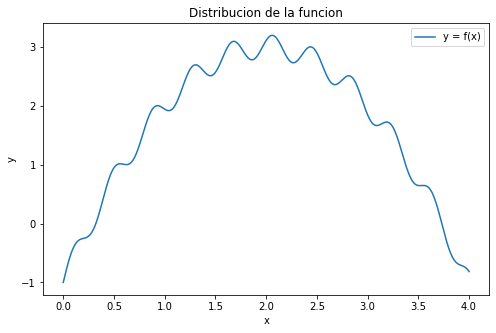

In [6]:
PlotDistribucion(DS.x,DS.y)

### Generamos la clase para nuestra red y la funcion de train

In [7]:
class Net2Layers(nn.Module):
    
    def __init__(self,Dim_in,Dim_H=3,Dim_out=1):
        super(Net2Layers,self).__init__()
        self.hidden_linear=nn.Linear(Dim_in,Dim_H)
        self.output_linear=nn.Linear(Dim_H,Dim_out)

        
    def forward(self,x):
        #Mi red tiene dos capas y como quiero hacer una regresion no tengo funcion de la salida
        x=torch.sigmoid(self.hidden_linear(x))  
        x=self.output_linear(x)
        return x

In [8]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=10,plot_number=100,log=True):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        for x,y in train_loader:
            optimizer.zero_grad()
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0 and log:
            PlotDistribucion(data_set.x,data_set.y,model,epoch)
        
        cost.append(total)
    return cost

### Definimos los parámetros e hiperparámetros para nuestra red y hacemos el train

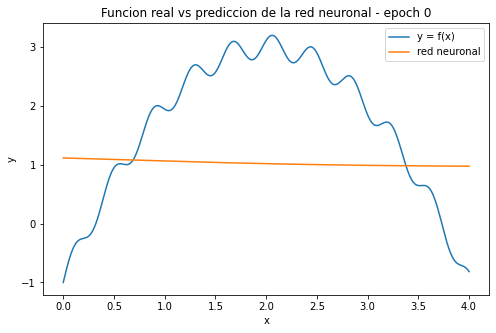

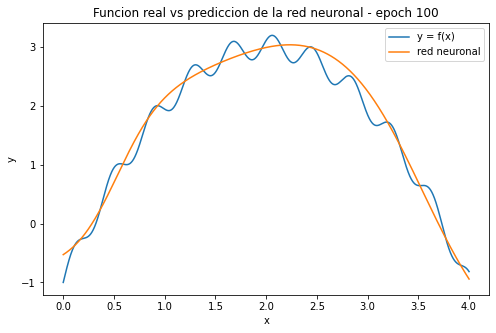

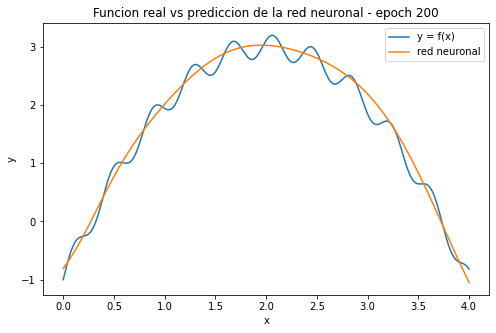

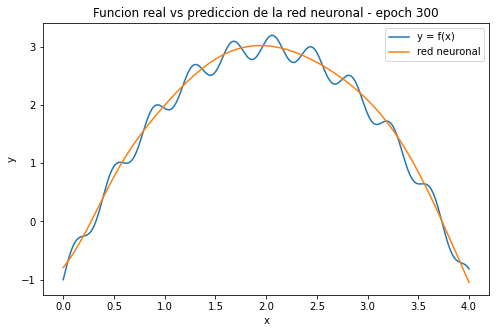

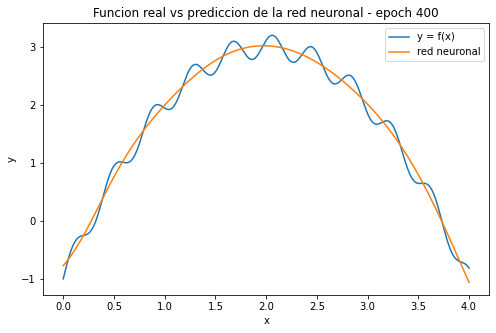

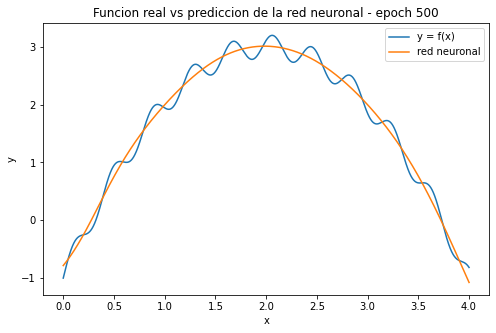

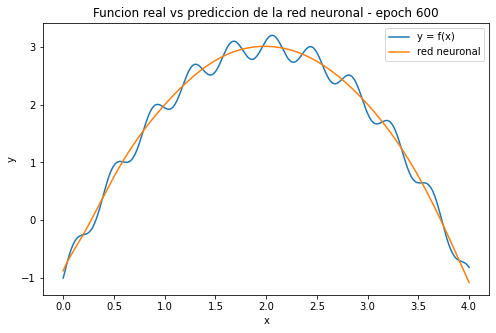

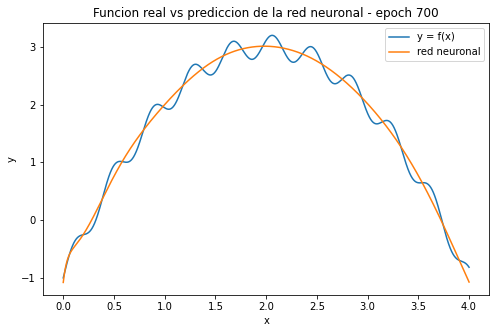

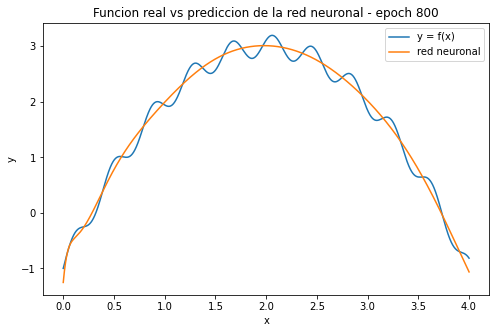

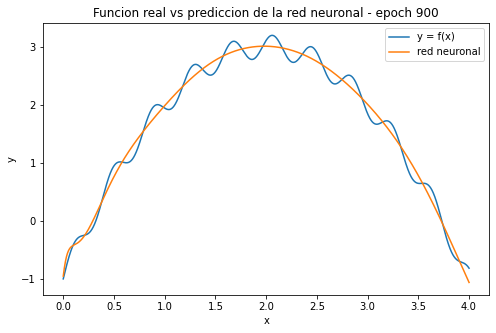

In [9]:
torch.manual_seed(0)

#Definimos hiperparametros
epochs=1000
lr=0.01
batch_size=100
num_ins_red = 1
num_outs_red = 1
num_neuronas_hidden_layer = 9
# Defino variable para plotear
plot_number = 100

# Definimos el modelo de nuestra red
model=Net2Layers(num_ins_red,num_neuronas_hidden_layer,num_outs_red)

# Defino la funcion de Loss
criterion=nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_loader=DataLoader(dataset=DS,batch_size=batch_size)

#Hago el train de mi red neuronal
lista_mse = train(DS,model,criterion, train_loader, optimizer, epochs=epochs,plot_number=plot_number)    


### Grafico el MSE versus la cantidad de epochs

In [10]:
def plotMSE(lista_mse):
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes()
    ax.set_title("Mean Square error")
    ax.set_xlabel("N° de eprochs")
    ax.set_ylabel("MSE")
    ax.plot(lista_mse, color='g', lw=2)
    plt.axhline(np.min(lista_mse), c='b', linestyle='--')
    leyenda_mse = "MSE minimo (" +str(round(np.min(lista_mse),3)) + ")"
    plt.legend(("MSE vs N° epochs",leyenda_mse))
    plt.title("MSE vs N° de eprochs")
    plt.show();

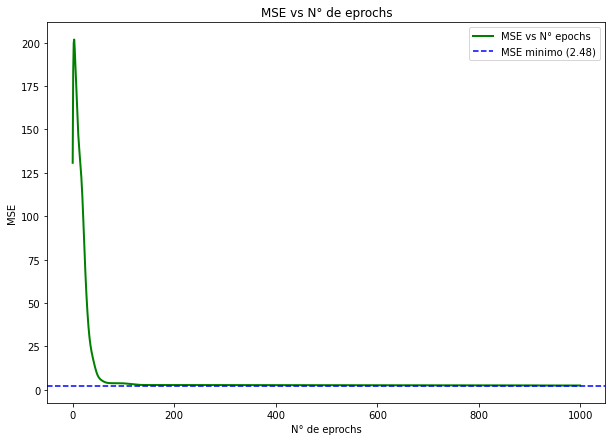

In [11]:
plotMSE(lista_mse)

### Probamos nuestra red con diferentes learning rates y neuronas en nuestra hidden layer (epochs = 300)

In [12]:
lista_neuronas = [1,5,10,20,25]
lista_lr = [0.5,0.1,0.01]
epochs=1000
batch_size=100
num_ins_red = 1
num_outs_red = 1
num_neuronas_hidden_layer = 9
# Defino variable para plotear
plot_number = 1000
log = False


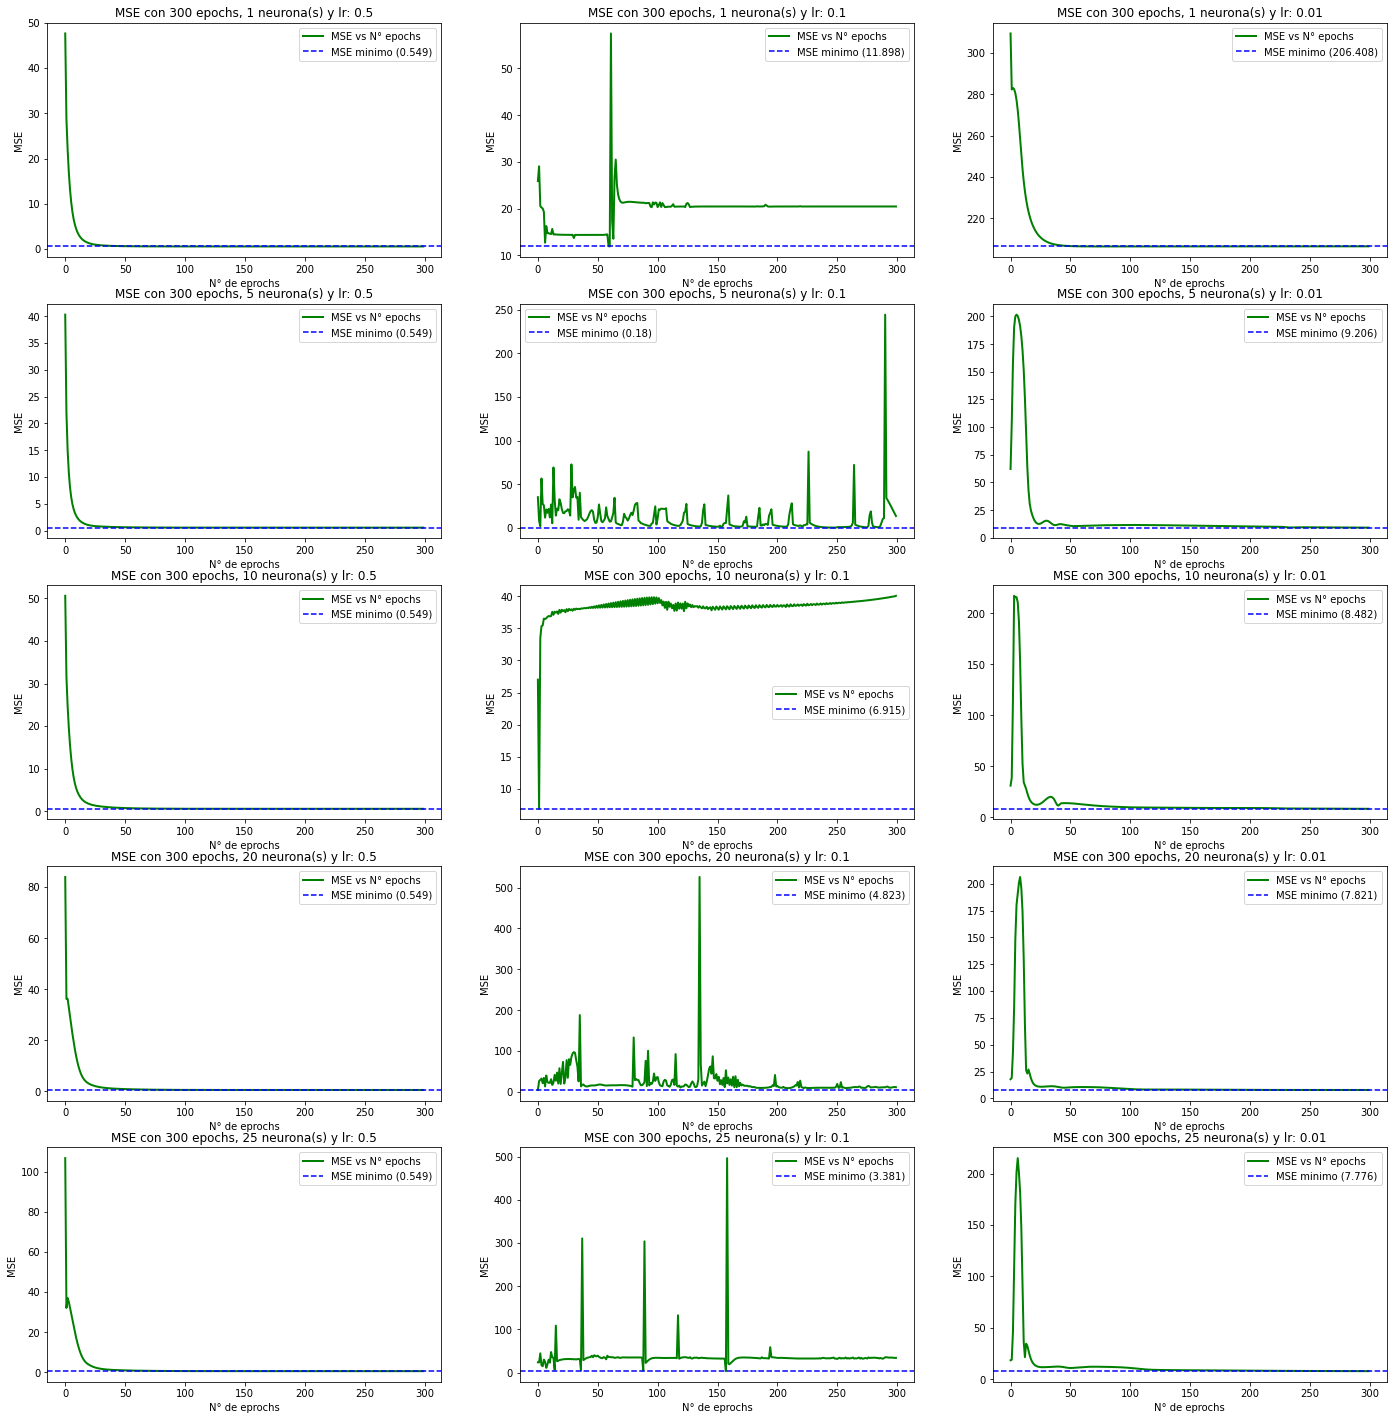

In [13]:
plt.figure(figsize=(24,25))
cant_lineas = len(lista_neuronas)
cant_cols = len(lista_lr)
i = 0
batch_size= 50
epochs = 300
for neuronas in lista_neuronas:
    for lrs in lista_lr:
        i += 1
        
        # Definimos el modelo de nuestra red
        model=Net2Layers(num_ins_red,neuronas,num_outs_red)
        criterion=nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lrs)
        train_loader=DataLoader(dataset=DS,batch_size=batch_size)
        lista_mse = train(DS,model,criterion, train_loader, optimizer, epochs=epochs,plot_number=plot_number,log=log)                 
        
        plt.subplot(cant_lineas,cant_cols,i);
        plt.plot(lista_mse, color='g', lw=2)
        plt.xlabel('N° de eprochs')
        plt.ylabel('MSE')
        plt.axhline(np.min(lista_mse), c='b', linestyle='--')
        leyenda_mse = "MSE minimo (" +str(round(np.min(lista_mse),3)) + ")"
        plt.legend(("MSE vs N° epochs",leyenda_mse))
        titulo = "MSE con "+str(epochs)+" epochs, " + str(neuronas)+ " neurona(s) y lr: "+str(lrs)
        plt.title(titulo)